# Examples for using plasmaslicer for 1D simulation data
### by :Sumner B. Harris

The python package "plasmaslicer" was developed to aid in exploring/plotting the data that is generated during simulations of laser-generated plasmas. The simulation code was developed in a collaboration between UAB and CFDRC and the details can be found in a publication (https://iopscience.iop.org/article/10.1088/1361-6463/ab4828). This notebook will guided you through the functions for the module "one_d_tools" that are designed to be used with the one dimensional version of the laser-plasma simulation.

First thing, you will need to have git installed in order to clone the repository. Or you can manually download from GitHub and skip this step.
Git can be downloaded here: https://git-scm.com/downloads

Restart Anaconda if you needed to install git.

First, we will download the repository from GitHub so we have access to the example data.

In [1]:
# makes sure the large file system is active so the example data can be downloaded
!git lfs install

# downloads the repositity to current directory
!git clone https://github.com/sumner-harris/plasmaslicer

# this is a dependency you may not have
!pip install celluloid

Git LFS initialized.


Cloning into 'plasmaslicer'...


Next, you can actually install this module so that you don't have to clone the repo to use plasmaslicer everytime you need it.

In [2]:
# installs plasmaslicer
!pip install git+https://github.com/sumner-harris/plasmaslicer 
    

# If you want to uninstall plasmaslicer later, go to your command line and use:
# pip uninstall plasmaslicer

  Cloning https://github.com/sumner-harris/plasmaslicer to c:\users\sumner\appdata\local\temp\pip-req-build-d31odj5p
  Created wheel for plasmaslicer: filename=plasmaslicer-0.1-py3-none-any.whl size=3854 sha256=c1e42b796ca721b829c004530d6b2e190d5dfc64d6c2145057b48febdce90978
  Stored in directory: C:\Users\Sumner\AppData\Local\Temp\pip-ephem-wheel-cache-8qkc2iiv\wheels\6c\53\4c\30fa8b5cb9a7cf86a5f9804a8ad010b9bba94c1f562f405144
Successfully built plasmaslicer


Inside the plasmaslicer folder, I have included a .zip file which contains the results from a short, 1D simulation of laser ablation of a Te target, using a laser fluence 4 J/cm$^2$. The cell below will unzip that file using shutil.unpack_archive and create the data directory in the current folder.

In [3]:
from shutil import unpack_archive

file= "plasmaslicer/sim_te_2.0e8_alpha-6.65e7_R-0.26_short.zip"

unpack_archive(file)

# Using the plasmaslicer.one_d_tools module

The module one_d_tools is meant to be used with the .dat output files from the 1D version of the laser plasma simulation. I made this module to help with some of the pain points that arise when trying study the results of many individual simulations. Alternatively, you can use the program ParaView (https://www.paraview.org/) with the .vtu files that are in the results folder. While ParaView is a great program, I find that it crashes a lot for me when trying to plot quantities over time and it can be slow and tedious.

**If you installed plasmaslicer with pip, you can now import it like any other package.**

**If you did not install it, you will need to import one_d_tools.py using: "from plasmaslicer.plasmaslicer import one_d_tools" instead of the import statement below.**

In [4]:
# use the import below if you did not install plasma slicer
# from plasmaslicer.plasmaslicer import one_d_tools

from plasmaslicer import one_d_tools # imports the one_d_tools module from plasmaslicer
import numpy as np # need this to create some arrays later
import matplotlib.pyplot as plt # imported to show you some plots
from sys import getsizeof # used to check memory usage

# Function: get_data

The get_data function takes in the path of the directory where your data lives. It returns a list where each element in the list is a pandas DataFrame of all of the simulation outputs as a function of distance at a specific time. This list will be used in the rest of the one_d_tools functions. This list could become very large and consume a lot of RAM if you have a large number of output files. If that is a problem, you need to subset your data by time ranges, place the files in different directories, and only work with one at a time. The example data is small and will not cause a problem.

All the units are SI.

In [5]:
# assign the data directory
data_directory = "sim_te_2.0e8_alpha-6.65e7_R-0.26_short"

# load our results into the 
data = one_d_tools.get_data(data_directory)

# this line is optional, but shows you how to check the memory usage of your data list, in MB
mem_use = getsizeof(data)/1e6
print('Data list memory usage: {} MB'.format(mem_use))

Found 123 result files.
Building your list now, please hold.
Halfway done...
Done.
Data list memory usage: 0.001072 MB


We can inspect the data, one element at a time just to see how it is formatted. Each element has the same format and they are odered by increasing time, e.g. data[0] is at t = 0, data[-1] is at the end time for the simulation.

In [6]:
print("Length of data list:",len(data),'elements')
#inspect the first few rows of the the first element
data[0].head()

Length of data list: 123 elements


,x,y,dens,frho,T,u.x,uf.x,Ilaser,IlaserAbsorp,n0,...,ni1,ni2,x0,xe,xi,xi2,alphaIBen,alphaIBei,Level,t
0,2.098083e-07,2.098083e-07,1.000000e+18,2.118848e-07,300.0,0.0,0.0,0.0,3.860908e+09,1.000000e+18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
1,2.098083e-07,6.294250e-07,1.000000e+18,2.118848e-07,300.0,0.0,0.0,0.0,3.860908e+09,1.000000e+18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
2,6.294250e-07,2.098083e-07,1.000000e+18,2.118848e-07,300.0,0.0,0.0,0.0,3.860908e+09,1.000000e+18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
3,6.294250e-07,6.294250e-07,1.000000e+18,2.118848e-07,300.0,0.0,0.0,0.0,3.860908e+09,1.000000e+18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
4,2.098083e-07,1.049042e-06,1.000000e+18,2.118848e-07,300.0,0.0,0.0,0.0,3.860908e+09,1.000000e+18,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0


# Function: get_header
#### get_header()

The get_header function returns the list of values that you have access to, you will need to know these to plot things later.

In [7]:
columns = one_d_tools.get_header()
print(columns)

['x', 'y', 'dens', 'frho', 'T', 'u.x', 'uf.x', 'Ilaser', 'IlaserAbsorp', 'n0', 'ne', 'ni1', 'ni2', 'x0', 'xe', 'xi', 'xi2', 'alphaIBen', 'alphaIBei', 'Level']


# Function: get_time
#### get_time(data)
The get_time function takes in your data list and returns an array of all the time outputs which you can use for your time axis. The time unit is seconds. This example runs from 0 to 60 ns.

In [8]:
time = one_d_tools.get_time(data)
print(time)

[0.00000e+00 9.09091e-12 2.64463e-11 5.18631e-10 1.06351e-09 1.50153e-09
 2.05731e-09 2.53558e-09 3.02209e-09 3.51372e-09 4.00852e-09 4.50529e-09
 5.00328e-09 5.50204e-09 6.00127e-09 6.50079e-09 7.00049e-09 7.50030e-09
 8.00019e-09 8.50012e-09 9.00007e-09 9.50005e-09 1.00000e-08 1.05000e-08
 1.10000e-08 1.15000e-08 1.20000e-08 1.25000e-08 1.30000e-08 1.35000e-08
 1.40000e-08 1.45000e-08 1.50000e-08 1.55000e-08 1.60000e-08 1.65000e-08
 1.70000e-08 1.75000e-08 1.80000e-08 1.85000e-08 1.90000e-08 1.95868e-08
 2.00540e-08 2.05042e-08 2.10257e-08 2.15258e-08 2.20219e-08 2.25195e-08
 2.30205e-08 2.35261e-08 2.40369e-08 2.45532e-08 2.50751e-08 2.55141e-08
 2.60458e-08 2.65828e-08 2.70344e-08 2.75815e-08 2.80410e-08 2.85608e-08
 2.90384e-08 2.95385e-08 3.00122e-08 3.05049e-08 3.10244e-08 3.15748e-08
 3.20687e-08 3.25390e-08 3.30375e-08 3.35026e-08 3.40353e-08 3.45131e-08
 3.50114e-08 3.55388e-08 3.60203e-08 3.65345e-08 3.70771e-08 3.75399e-08
 3.80082e-08 3.85760e-08 3.90545e-08 3.95393e-08 4.

# Function: find_nearest
#### find_nearest(array, value, return_index=False)
The find_nearest function is a helper that is used in some other functions. It is needed because our simulation used an unstructured grid so number and the spacing of the space points changes with every time step. It takes in an array and a value, it returns the closest value in the array to the input value. You can choose to get the acutal value or the index of that point by using the option return_index, which is False by default.

In [9]:
# Example, in the time array above, the time 60.0 ns does not exist.
# We can use find_nearest to return the closest time point.
nearest_value = one_d_tools.find_nearest(time,60.0e-9)
print('Nearest value to 60 ns is {:.3f} ns'.format(nearest_value*1e9))

# You can also return the index instead 
nearest_index = one_d_tools.find_nearest(time,60.0e-9,return_index=True)
print('Nearest index to 60 ns is {}'.format(nearest_index))

Nearest value to 60 ns is 60.014 ns
Nearest index to 60 ns is 122


# Function: get_x_data
#### get_x_data(data,key,t,return_nearest=False)
The function get_x_data returns 2 arrays: the distance axis and the requested parameter, in that order, at a specific point in time. It takes in the data list, the key that want to plot (from the header list), and the time that you want. The option "return_nearest" will tell you the exact time that was used. (See function find_nearest)

Nearest time was 60.01 ns


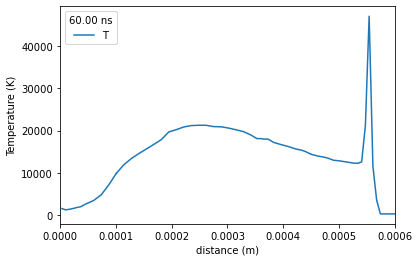

In [10]:
# assign x, val to get your val vs distance arrays.
# I will get Temperature vs x at 60 ns
at_time = 60e-9
key = 'T'
x, Temperature = one_d_tools.get_x_data(data,key,at_time, return_nearest=True) 

# Uncomment the line below to use without printing the actual time used
#x, Temperature = one_d_tools.get_x_data(data,key,at_time)

# then you can plot if you like
plt.plot(x, Temperature,label=key)
plt.xlim(0,600e-6)
plt.xlabel('distance (m)')
plt.ylabel('Temperature (K)')
plt.legend(title='{:.2f} ns'.format(at_time*1e9))
plt.show()

# Function: get_time_data
#### get_time_data(data,key,d, loud = True, return_nearest=False)
The function get_time_data returns 2 array: the time array and the requested parameter, in that order, at a specific point in space. It takes in the data list, the key that want to plot (from the header list), and the point in space that you want. The option "return_nearest" will tell you the exact space point that was used. (See function find_nearest) The option "loud" is there to tell you that the data is being sliced through, because this could take quite a while for a very large dataset.

Slicing the data now...
This slice took 0.05 seconds so consider that for future slices.


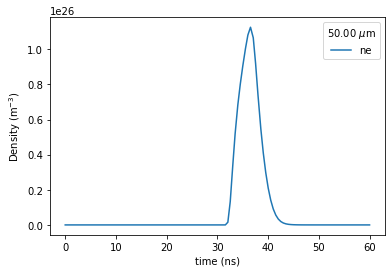

In [11]:
# assign t, val to get your val vs t arrays.
# I will get electron density vs t at 50 micrometers
at_place = 50e-6
key = 'ne'
t, electron_dens = one_d_tools.get_time_data(data,key,at_place, return_nearest=False) 

# Uncomment the line below to use without printing the actual time used
#x, Temperature = one_d_tools.get_x_data(data,key,at_time)

# then you can plot if you like
plt.plot(t*1e9, electron_dens,label=key)
#plt.xlim(0,600e-6)
plt.xlabel('time (ns)')
plt.ylabel('Density (m$^{-3}$)')
plt.legend(title='{:.2f} $\mu$m'.format(at_place*1e6))
plt.show()

# Function: animate_density
#### animate_density(data,times,keys,xlims=None,ylims=None, labels=None, units='mm',size=(8,4),save_file=False,filename=None,fps=None, dpi=600)

The animate_density function is used to visualize the time evolution of the density of neutrals, electrons, singly, and doubly, ionized species. We have to do this all the time so I packaged it up into a function for you. This function could take a long time with a large dataset, but you can speed it up for testing by not saving the file. It takes in several parameters:

* data: your data list
* times: this needs to be a list or array of the times you want to inlucde in the animation
* keys: this should be a list of the density values you want to include in the plot
* xlims: this is a tuple of the x axis bounds, need to be in your chosen units. e.g. (0,100) for 0 to 100 microns
* ylims: this is a tuple of the y axis bounds, e.g. (1e18,1e25)
* labels: This is what you want to label each key as in the legend. The default is the same as the keys.
* units: units of the x axis, takes in wither 'cm', 'mm', or 'um'. Scale your limits appropriately. Default is 'mm'
* size: sets the figure size, default is (8,4).
* save_file: Default is False. If you wish to save the animation, set to True.
* filename: required if save_file=True. Must be string that ends with .mp4.
* fps: frames per second to save the video. Controls video length when compared to number of time steps.
* dpi: dots per inch. Sets saved video resolution. 600 is default.

The animation is displayed as HTML in the notebook and looks like lower quality than the actual saved video. FYI.

In [12]:
# I will plot Te0, Te1+, Te2+, and e- from 0-60 ns with a 1 ns step and save to an mp4.

#use arange or linspace to get your time list. Or just use your real time axis.
ts = np.arange(0,60e-9,1e-9) 

# I want all 4 species this time, but you could exclude any that you like.
keys = ['n0','ne','ni1','ni2']

# Since this is a Te simulation, I will label them appropriatly
labels = ['Te$^0$','e$^{-}$','Te$^{1+}$','Te$^{2+}$']

# plot limit tuples in microns. Remeber that mm is defaul if you don't specify.
xlims = (0,600)
ylims = (1e18,1e28)

one_d_tools.animate_density(data,ts,keys,xlims,ylims,units='um',labels=labels)

# Uncomment the line below (and comment out the line above) to save the animation.
#one_d_tools.animate_density(data,ts,keys,xlims,ylims,units='um',labels=labels,filename='Te_density.mp4', save_file=True)

# Function: animate_values
#### animate_values(data,times,keys,colors,ylabel=None,xlims=None,ylims=None,labels=None,units='mm',size=(8,4),save_file=False,filename=None,fps=None, dpi=600)
The animate_values function is used to visualize the time evolution of values other than density. This is a more general version of animate_density. This function could take a long time with a large dataset, but you can speed it up for testing by not saving the file. It takes in several parameters:

* data: your data list.
* times: this needs to be a list or array of the times you want to inlucde in the animation.
* keys: this should be a list of the density values you want to include in the plot.
* colors: list of colors you want the corresponing keys to be.
* ylabel: string to label your y axis.
* xlims: tuple of the x axis bounds, need to be in your chosen units. e.g. (0,100) for 0 to 100 microns
* ylims: tuple of the y axis bounds, e.g. (1e18,1e25)
* labels: This is what you want to label each key as in the legend. The default is the same as the keys.
* units: units of the x axis, takes in wither 'cm', 'mm', or 'um'. Scale your limits appropriately. Default is 'mm'
* size: sets the figure size, default is (8,4).
* save_file: Default is False. If you wish to save the animation, set to True.
* filename: required if save_file=True. Must be string that ends with .mp4.
* fps: frames per second to save the video. Controls video length when compared to number of time steps.
* dpi: dots per inch. Sets saved video resolution. 600 is default.

In [13]:
# I will plot the inverse bremsstrahlung coefficients from 0-60 ns with a 1 ns step and save to an mp4.

#use arange or linspace to get your time list. Or just use your real time axis.
ts = np.arange(0,60e-9,1e-9) 

# I want all 4 species this time, but you could exclude any that you like.
keys = [ 'alphaIBen','alphaIBei',]

# Since this is a Te simulation, I will label them appropriatly
labels = ['$\\alpha_{IB,e-n}$','$\\alpha$ $_{IB,e-i}$']
colors=['k','r']

# plot limit tuples in microns. Remeber that mm is defaul if you don't specify.
xlims = (0,0.500)
ylims = (1e-6,1e7)

one_d_tools.animate_values(data,ts,keys,labels=labels,xlims=xlims,ylims=ylims,colors=colors,ylabel='$\\alpha_{IB}$')

# Uncomment the lines below (and comment out the line above) to save the animation.
#one_d_tools.animate_values(data,ts,keys,labels=labels,xlims=xlims,ylims=ylims,
#                           colors=colors,ylabel='$\\alpha_{IB}$',filename="alpha.mp4",save_file=True)


Using mm for x scale, check your xlims if you do not see your data.


# Function: create_map_data
#### create_map_data(data,x_array, y_array, key)
The function create_map_data creates a dataset to plot a 2D heat map. This function isn't bulletproof and you need to be carefull about the size of the arrays you use. It works well for plotting a heatmap of a value with time on the x axis and distance on the y axis. It takes in your data list, an array of x values (time) and y values (distance) and a key (from get_header).

In [14]:
# I will create a dataset for plotting Temperature as a function of time and space.

# get my time axis from get_time function.
time = one_d_tools.get_time(data)

# create an array of space points to plot data over. In this case, from 0-500 microns with a step of 5 microns.
distance = np.arange(0,500e-6,5e-6) # 100 points

# assign my key for temperature
key = 'T'

# save the resulting array to mapdata
mapdata = one_d_tools.create_map_data(data, time, distance, key)
print('time array size:',time.shape)
print('space array size:',distance.shape)
print('mapdata array size:',mapdata.shape)
mapdata

time array size: (123,)
space array size: (100,)
mapdata array size: (100, 123)


array([[  300.    ,   300.    ,   308.2679, ...,  1571.46  ,  1563.962 ,
         1556.596 ],
       [  300.    ,   300.    ,   300.    , ...,  1571.46  ,  1563.962 ,
         1556.596 ],
       [  300.    ,   300.    ,   300.    , ...,  1273.694 ,  1267.485 ,
         1261.132 ],
       ...,
       [  300.    ,   300.    ,   300.    , ..., 13120.85  , 13297.07  ,
        13483.33  ],
       [  300.    ,   300.    ,   300.    , ..., 12759.62  , 12859.01  ,
        12989.28  ],
       [  300.    ,   300.    ,   300.    , ..., 12759.62  , 12859.01  ,
        12989.28  ]])

# Function: plot_map
#### plot_map(x_array, y_array, mapdata, title=None,levels=None, log=False)
The plot_map function is designed to take in 1D arrays for the x and y axes, and an appropriately shaped mapdata array (see function create_map_data.) and return a 2D colormap plot. The "title" option lets you name the colorbar. The "levels" option lets you change the colormap scale and the "log" option normalizes the mapdata to a log scale. The resuling plot can be manipulated through normal matplotlib commands.

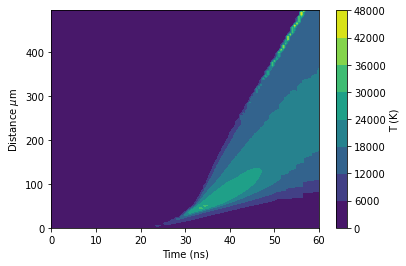

In [15]:
#Minimal example plot the mapdata
one_d_tools.plot_map(time*1e9,distance*1e6,mapdata, title='T (K)')
plt.xlabel('Time (ns)')
plt.ylabel('Distance $\mu$m')
plt.show()

C:\Users\Sumner\Anaconda3\lib\site-packages\plasmaslicer\one_d_tools.py:130: UserWarning: Log scale: values of z <= 0 have been masked
  CF = plt.contourf(x_array,y_array,mapdata,levels=levels,norm=colors.LogNorm())


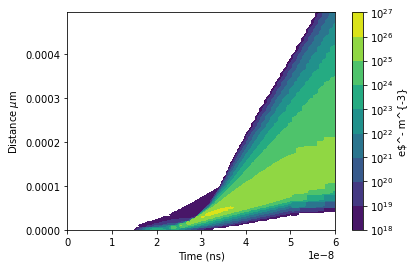

In [16]:
# More complicated example, plot density of electrons on a log scale
# get my time axis from get_time function.
time = one_d_tools.get_time(data)

# create an array of space points to plot data over. In this case, from 0-500 microns with a step of 5 microns.
distance = np.arange(0,500e-6,5e-6) # 100 points

key = 'ne'

# save the resulting array to mapdata
mapdata = one_d_tools.create_map_data(data, time, distance, key)

# assign list of levels
levels=[1e18,1e19,1e20,1e21,1e22,1e23,1e24,1e25,1e26,1e27]

one_d_tools.plot_map(t, distance, mapdata,levels=levels,log=True, title='e$^- m^{-3}')
plt.xlabel('Time (ns)')
plt.ylabel('Distance $\mu$m')
plt.show()

# Another Example for using one_d_tools
Plotting temperature vs distance for several time points:

[]

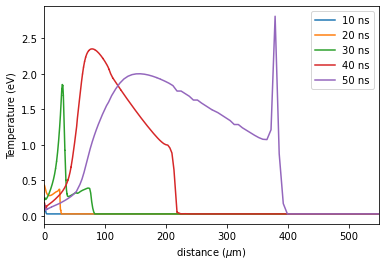

In [17]:
ts = np.arange(10e-9,60e-9,10e-9)

for i in range(len(ts)):

    x, T = one_d_tools.get_x_data(data,'T',ts[i])
    plt.plot(x*1e6,T/11600,label='{:.0f} ns'.format(ts[i]*1e9))

plt.legend()
plt.xlim(0,550)
plt.xlabel('distance ($\mu$m)')
plt.ylabel('Temperature (eV)')
plt.plot()